## Task 3

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.utils import resample
from sklearn.feature_selection import SelectKBest, mutual_info_classif

df = pd.read_csv('train.csv')
df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


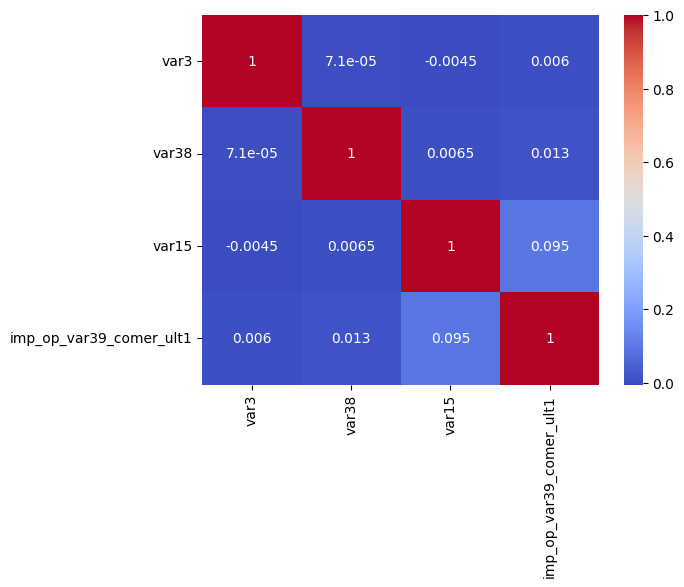

In [5]:
cols = ["var3","var38","var15","imp_op_var39_comer_ult1"]
corr = df[cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

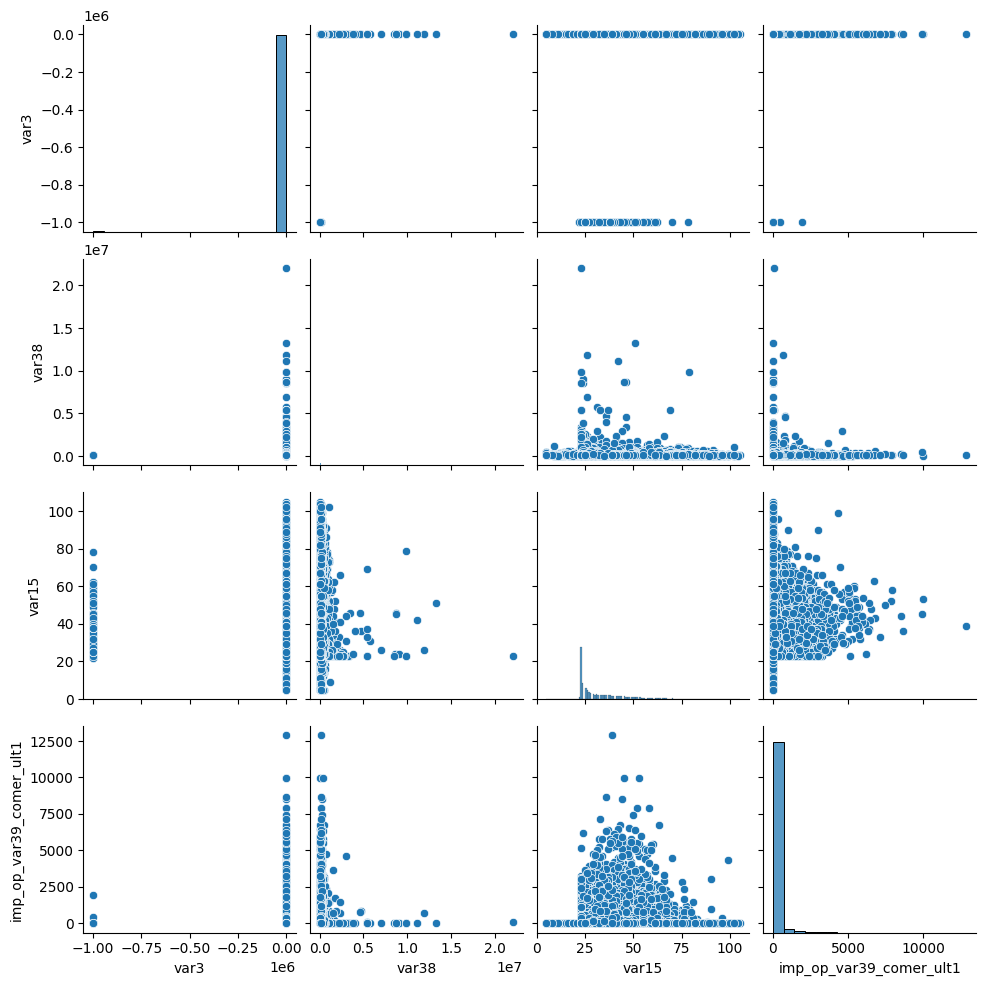

In [11]:
sns.pairplot(df[cols].dropna())
plt.show()


In [12]:
nulls = df.isnull().sum()
print(nulls[nulls>0])
df.fillna(df.mean(numeric_only=True), inplace=True)

Series([], dtype: int64)


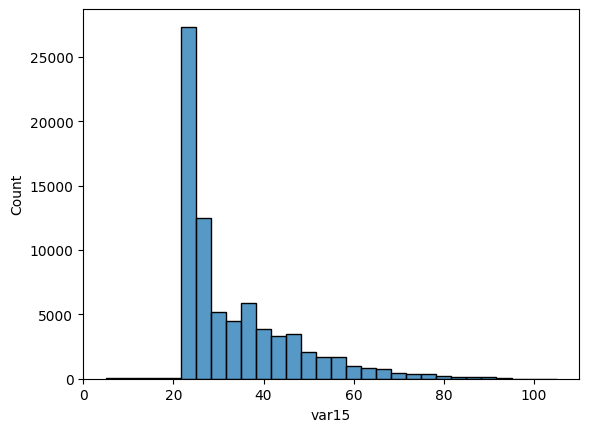

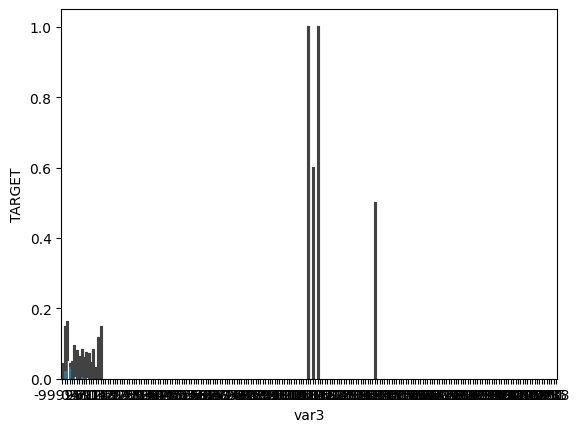

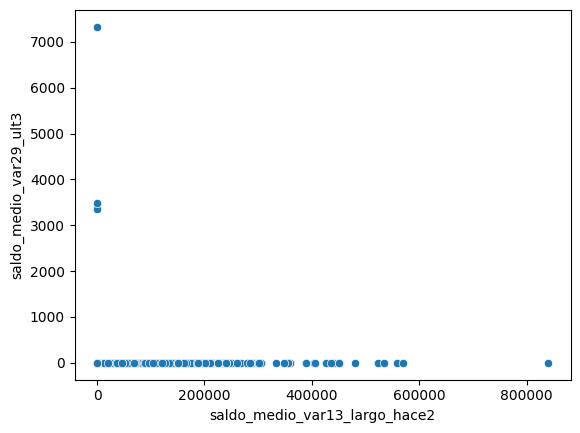

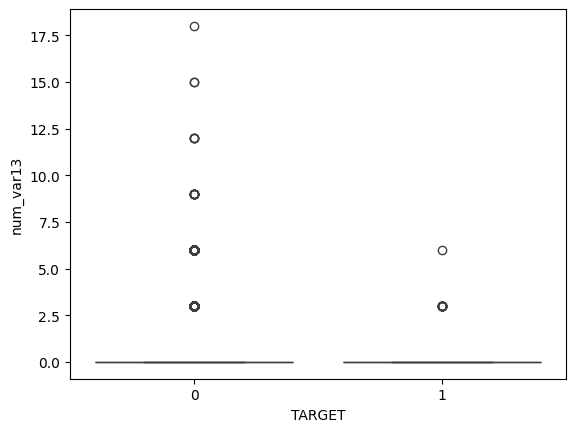

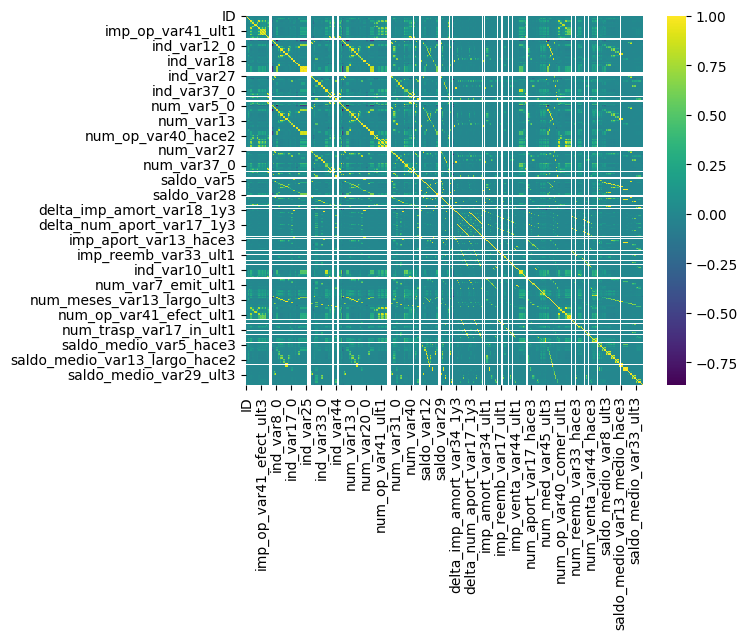

In [13]:
sns.histplot(df['var15'], bins=30)
plt.show()

sns.barplot(data=df, x='var3', y='TARGET')
plt.show()

sns.scatterplot(data=df, x='saldo_medio_var13_largo_hace2', y='saldo_medio_var29_ult3')
plt.show()

sns.boxplot(data=df, x='TARGET', y='num_var13')
plt.show()

sns.heatmap(df.corr(numeric_only=True), cmap="viridis")
plt.show()

TARGET
0    73012
1     3008
Name: count, dtype: int64


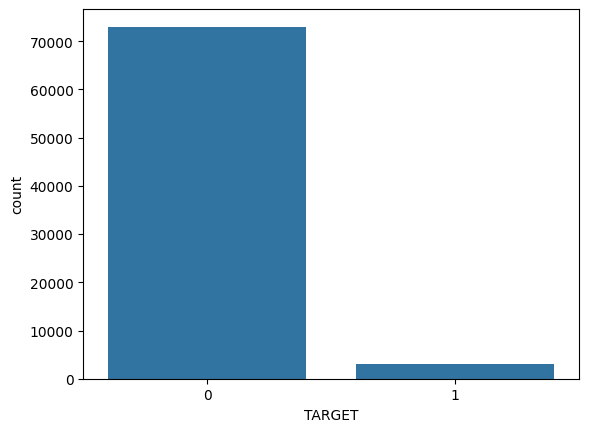

In [14]:
print(df['TARGET'].value_counts())
sns.countplot(x='TARGET', data=df)
plt.show()

In [15]:
major = df[df.TARGET==0]
minor = df[df.TARGET==1]
minor_up = resample(minor, replace=True, n_samples=len(major), random_state=42)
df = pd.concat([major, minor_up])
print(df['TARGET'].value_counts())


TARGET
0    73012
1    73012
Name: count, dtype: int64


In [16]:
corr_matrix = df.corr(numeric_only=True).abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
drop_cols = [c for c in upper.columns if any(upper[c]>0.65)]
df = df.drop(columns=drop_cols)
print("Dropped features:", drop_cols)

Dropped features: ['imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult3', 'imp_op_var41_comer_ult1', 'imp_op_var41_comer_ult3', 'imp_op_var41_efect_ult3', 'imp_op_var41_ult1', 'imp_op_var39_efect_ult1', 'imp_op_var39_efect_ult3', 'imp_op_var39_ult1', 'ind_var1', 'ind_var8_0', 'ind_var8', 'ind_var12', 'ind_var13_corto_0', 'ind_var13_corto', 'ind_var13_largo', 'ind_var13_medio', 'ind_var13', 'ind_var17', 'ind_var18', 'ind_var20', 'ind_var24_0', 'ind_var24', 'ind_var25_cte', 'ind_var26_0', 'ind_var26_cte', 'ind_var26', 'ind_var25_0', 'ind_var25', 'ind_var29_0', 'ind_var29', 'ind_var30', 'ind_var31_0', 'ind_var31', 'ind_var32_0', 'ind_var32', 'ind_var33', 'ind_var34', 'ind_var37_0', 'ind_var37', 'ind_var40_0', 'ind_var40', 'ind_var41_0', 'ind_var39', 'ind_var44_0', 'ind_var44', 'num_var1_0', 'num_var1', 'num_var4', 'num_var5_0', 'num_var5', 'num_var6_0', 'num_var6', 'num_var8_0', 'num_var8', 'num_var12', 'num_var13_0', 'num_var13_corto_0', 'num_var13_corto', 'num_

In [17]:
X = df.drop('TARGET', axis=1)
y = df['TARGET']
selector = SelectKBest(score_func=mutual_info_classif, k=5)
X_new = selector.fit_transform(X, y)
selected = X.columns[selector.get_support()]
print("Selected features:", selected.tolist())
df_selected = df[selected]

Selected features: ['ID', 'saldo_var5', 'saldo_medio_var5_hace2', 'saldo_medio_var5_hace3', 'var38']
